In [40]:
using JLD2
using MIRT: jim
using Plots: plot, plot!
using Images: assess_psnr

# Useful to flip images
function rev(img::AbstractArray{T, 2}) where T
    img[end:-1:1, end:-1:1]
end

normIm = (x) -> abs.(x) |> (x) -> x/max(x...); 

# Load the data
datafile = joinpath("C:\\Users\\Nick\\Desktop\\data", "files_1_5_results.jld2");
@load datafile x̂ PSNR RMSE testR fNames imgs sampleMasks noisy_imgs
nR = length(testR)
nImgs = length(imgs);

In [64]:
plotImg = Array{Any}(undef, nImgs, 2)
for i = 1:nImgs
    plotImg[i, 1] = jim(abs.(rev(imgs[i])))
    noisyPSNR = assess_psnr(noisy_imgs[i], imgs[i]) |> (x) -> round(x, digits = 2)
    plotImg[i, 2] = jim(abs.(rev(noisy_imgs[i])), title = "PSNR = $noisyPSNR")
end
plot!(plotImg[1, 1], ylabel = "Reference")
plot!(plotImg[1, 2], ylabel = "Noisy Reference")
plot(plotImg..., layout = (2, nImgs), colorbar = false, size = (900,500), titlefontsize = 10)

# Sample Masks

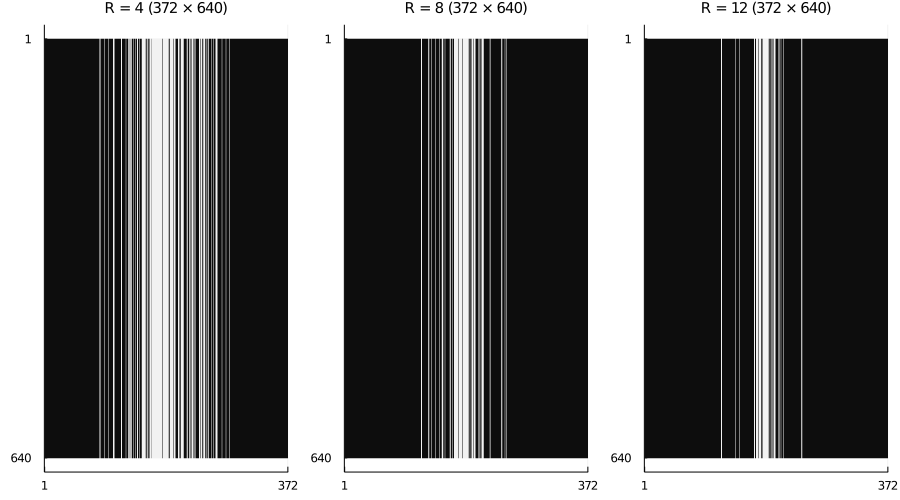

In [62]:
plotMasks = Dict{typeof((1,1,1)), Any}()
for (key, mask) in sampleMasks
    (R, M, N) = key
    push!(plotMasks, key => jim(mask, title = "R = $R ($M × $N)"))
end
(M, N) = 372, 640
plot(plotMasks[testR[2], M, N],
     plotMasks[testR[3], M, N],
     plotMasks[testR[4], M, N],
     layout = (1, :),
    colorbar = false,
    size = (900,500),
    titlefontsize = 10)

# Plot a set of images

In [94]:
plotNorm = Array{Any}(undef, nImgs, nR)
sKey = ("norm", "admm")
for i = 1:nImgs, iR in 1:nR
    R = testR[iR]
    (M, N) = size(imgs[i])
    _psnr = round(PSNR[sKey][i, iR], digits = 2)
    plotNorm[i, iR] = jim(
        rev(x̂[sKey][i, iR]),
        title = "Norm, PSNR = $_psnr \n R = $R"
    )
    plot!(xlim = (1, M))
end

In [95]:
i = 2
plot(plotImg[i], plotNorm[i, :]..., layout = (1, :), colorbar = false, size = (900, 300), titlefontsize = 10)

# Plot Convergence

In [90]:
plotConv = [plot() for i in 1:nImgs]
sKey = ("norm", "admm")
for i = 1:nImgs, iR in 1:nR
    # Activate plot
    plot(plotConv[i])
    R = testR[iR]
    (M, N) = size(imgs[i])
    _rmse = RMSE[sKey][i, iR]
    plotConv[i] = plot!(_rmse, label = "R = $R", title = "Image $i")
end


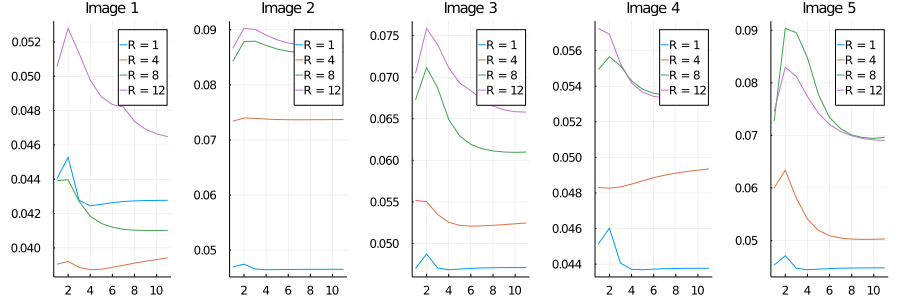

In [96]:
plot(plotConv..., layout = (1, :), colorbar = false, size = (900, 300), titlefontsize = 10)

Figures:
    example sample masks (4, 8, 12)
    convergence rates 
        - rmse/psnr v. iter
    plug vs knees
    one knee (one plug, one R, admm v pogm)
    nlmeans vs h (one knee, one R)
    table of psnr
    all for one knee (plug by R by admm)F